In [ ]:
#Problem Statement: In the analysis of NBA player statistics, there exists a need to comprehensively understand the multifaceted factors influencing a player's Points Per Game (PPG).
#While PPG serves as a fundamental metric of a player's scoring ability, the specific contributions of various performance indicators remain unclear.
#This research aims to investigate the relationships between PPG and a set of relevant variables, including playing time, shooting efficiency, rebounding, and defensive statistics.
#By exploring the nuanced interactions between these variables, the study seeks to provide insights into the key determinants of a player's scoring performance in the NBA.
#The findings are anticipated to contribute to a deeper understanding of player dynamics and inform strategic decision-making in team management and player development.

In [ ]:
#My dependent variable is continuous so it will be a regression problem
#I got my source of the code from (https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular)

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#assign my data to df and read the first 5 lines of the data
df = pd.read_csv('NBAStats2.csv')
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,24,TOR,3,0,21.7,3.0,8.0,...,1.000,2.7,5.3,8.0,1.3,0.0,0.3,2.0,2.7,7.3
1,2,Bam Adebayo,C,26,MIA,7,7,34.0,8.1,16.0,...,0.772,2.1,7.3,9.4,3.4,0.9,1.6,3.6,2.6,22.7
2,3,Ochai Agbaji,SG,23,UTA,10,2,16.3,1.7,4.1,...,0.000,0.5,1.7,2.2,1.0,0.2,0.6,0.7,1.3,4.4
3,4,Santi Aldama,PF,23,MEM,3,0,19.7,3.3,8.3,...,0.250,1.0,4.0,5.0,1.0,0.7,0.3,1.0,1.7,8.3
4,5,Nickeil Alexander-Walker,SG,25,MIN,8,2,19.3,1.5,4.5,...,0.333,0.1,2.1,2.3,3.0,0.8,0.9,1.0,1.5,4.0


In [ ]:
#Data Preperation
#Here is how I will find outliers for player points per game stat using interquartile range
#as we can see Devin Booker, Luka Doncic, and Joel Embid are my 3 outliers
Q1 = df['PTS'].quantile(0.25)
Q3 = df['PTS'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 2 * IQR
upper_bound = Q3 + 2 * IQR

outliers = df[(df['PTS'] < lower_bound) | (df['PTS'] > upper_bound)]
print(outliers)

      Rk        Player Pos  Age   Tm  G  GS    MP    FG   FGA  ...    FT%  \
46    45  Devin Booker  SG   27  PHO  2   2  36.0  11.5  20.0  ...  1.000   
103  100   Luka Don?i?  PG   24  DAL  9   9  36.7  11.2  21.7  ...  0.786   
115  112   Joel Embiid   C   29  PHI  8   8  33.9  10.9  21.3  ...  0.843   

     ORB  DRB   TRB   AST  STL  BLK  TOV   PF   PTS  
46   1.0  6.5   7.5  10.5  0.5  0.0  5.5  4.0  31.5  
103  0.7  8.2   8.9   8.4  1.3  0.6  4.4  2.1  32.9  
115  2.9  8.6  11.5   5.5  0.6  2.3  3.9  2.5  31.9  

[3 rows x 30 columns]


In [ ]:
#for comparison this is the league average Points Per Game
df['PTS'].mean()

8.631533477321813

In [ ]:
#In order for me to be sure about if my 3 outliers are real players, or was there some type of input error for PPG, I have created a player efficiency rating.
#If the outliers of PER matched outliers of PPG we can safely say that there was no input error for PPG
df['PER'] = (df['PTS'] + df['AST'] + df['TRB']+ df['BLK']+ df['STL']- df['TOV']- df['PF'])

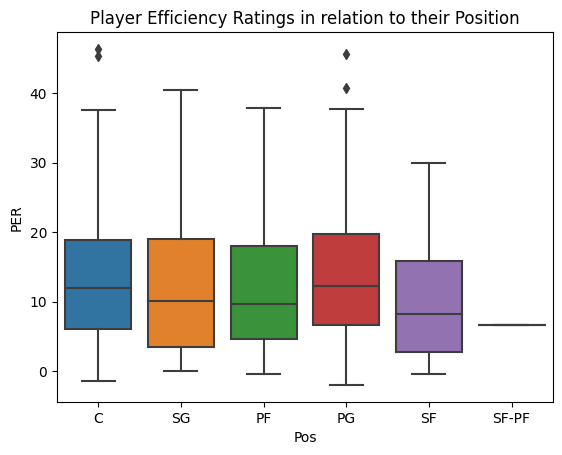

In [ ]:
#Data visualization, we can see from the boxplot that there are total of 4 outliers in my dataset according to my new variable 'PER'
sns.boxplot(x='Pos', y = 'PER', data=df)
plt.title("Player Efficiency Ratings in relation to their Position")
plt.show()

In [ ]:
#I will test to see the 2 outliers from the point guard position
#If the outliers are not the some of the best PGs in the league then that means there is something wrong with my variable 'PER'
point_guards = df[df['Pos'] == 'PG']

In [ ]:
#Here we are seeing the top 5 players by PER, and we have a match, Luka Doncic who was my outlier for PPG, is infact best PG by PER
sorted_PGs = point_guards.sort_values(by='PER', ascending=False)
sorted_PGs.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
103,100,Luka Don?i?,PG,24,DAL,9,9,36.7,11.2,21.7,...,0.7,8.2,8.9,8.4,1.3,0.6,4.4,2.1,32.9,45.6
136,133,Shai Gilgeous-Alexander,PG,25,OKC,8,8,35.5,11.0,21.3,...,0.8,6.3,7.0,6.4,2.3,0.8,2.5,2.1,28.8,40.7
263,258,Tyrese Maxey,PG,23,PHI,8,8,37.8,9.1,19.0,...,0.6,4.6,5.3,7.5,1.1,0.8,1.0,1.9,25.9,37.7
156,153,Tyrese Haliburton,PG,23,IND,8,8,32.8,8.3,16.4,...,0.5,3.8,4.3,11.6,0.9,0.6,2.6,1.3,23.6,37.1
124,121,De'Aaron Fox,PG,26,SAC,3,3,35.3,11.3,23.3,...,1.0,3.3,4.3,6.0,1.3,0.7,2.7,4.0,31.3,36.9


In [ ]:
ShootingGuards = df[df['Pos'] == 'SG']

In [ ]:
# Again here Devin Booker, top of the list by PER in Shooting guard position, which was also my outlier for PPG
sorted_SGs = ShootingGuards.sort_values(by='PER', ascending=False)
sorted_SGs.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
46,45,Devin Booker,SG,27,PHO,2,2,36.0,11.5,20.0,...,1.0,6.5,7.5,10.5,0.5,0.0,5.5,4.0,31.5,40.5
286,281,Donovan Mitchell,SG,27,CLE,7,7,35.9,11.1,21.9,...,1.1,3.7,4.9,5.6,2.3,0.6,2.7,2.1,30.7,39.3
25,26,Scottie Barnes,SG,22,TOR,8,8,36.9,8.0,16.5,...,3.0,7.4,10.4,6.0,1.5,2.1,2.9,2.5,21.5,36.1
112,109,Anthony Edwards,SG,22,MIN,8,8,35.6,10.4,20.8,...,0.9,5.4,6.3,5.3,1.3,0.4,3.6,2.0,27.9,35.6
21,22,Desmond Bane,SG,25,MEM,9,9,35.6,9.8,21.3,...,0.7,4.2,4.9,4.3,1.8,1.0,2.6,3.1,26.4,32.7


In [ ]:
Centers = df[df['Pos'] == 'C']

In [ ]:
#Again Joel Embid Ranking #2 by PER in the league, was also an outlier by PPG in my dataset.
sorted_Cs = Centers.sort_values(by='PER', ascending=False)
sorted_Cs.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER
211,208,Nikola Joki?,C,28,DEN,9,9,34.2,11.9,19.1,...,3.1,9.8,12.9,8.0,1.1,0.8,3.4,2.1,29.1,46.4
115,112,Joel Embiid,C,29,PHI,8,8,33.9,10.9,21.3,...,2.9,8.6,11.5,5.5,0.6,2.3,3.9,2.5,31.9,45.4
95,92,Anthony Davis,C,30,LAL,8,8,36.8,8.5,16.0,...,3.3,8.6,11.9,3.4,0.9,3.0,1.4,3.3,23.1,37.6
358,353,Domantas Sabonis,C,27,SAC,8,8,34.8,6.8,12.0,...,4.1,8.8,12.9,7.0,1.0,0.9,3.6,3.4,17.4,32.2
1,2,Bam Adebayo,C,26,MIA,7,7,34.0,8.1,16.0,...,2.1,7.3,9.4,3.4,0.9,1.6,3.6,2.6,22.7,31.8


In [ ]:
#Data Preparation #1
#Here I am looking for any missing values, but there is none.
df.isna().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
PER       0
dtype: int64

In [ ]:
df.dtypes

Rk          int64
Player     object
Pos        object
Age         int64
Tm         object
G           int64
GS          int64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
PER       float64
dtype: object

In [ ]:
# ***  Predict PPG by using Minutes Played, Assists, 3P%, 2P%, EFG%, FT%,ORB,3PT attempts,... ***
# Using linear regression

In [ ]:
mod1 = df[['PTS','MP','FG%','3P%','2P%','FT%']]

In [ ]:
X = mod1.drop('PTS', axis=1)

In [ ]:
y = mod1['PTS']

In [ ]:
X.shape, y.shape

((463, 5), (463,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#y_pred is predicted values of the target variable, now we compare those to the actual values, we do this to evaluate the perforance of the model
#For example, as a player increases their field goal attempts, what is the likely hood their PPG increases.
y_pred = model.predict(X_test)

In [ ]:
r_squared = r2_score(y_test, y_pred)
#Variance of dependent variable, explained by the independent variables
#How well model fits the data, higher is better

In [ ]:
print(f"R-squared: {r_squared}")

R-squared: 0.7409102116869145


In [ ]:
#coefficient values of our independent variables
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

  Feature  Coefficient
0      MP     0.551335
1     FG%     3.862138
2     3P%     1.860099
3     2P%    -1.164234
4     FT%     0.887423


In [ ]:
#adjusted R-squared accounts for the number of variables in the model
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

#Average squared distance between predicted and actual values, lower is better
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

#value of dependent variable when independent values are all zero, if positive target increases as features increase, if negative target decreases as features decrease
intercept = model.intercept_
print(f"Intercept: {intercept}")

Adjusted R-squared: 0.7260199939677716
Mean squared error: 15.812717993649832
Intercept: -4.00721115067552


In [ ]:
#adjusted R-squared accounts for the number of variables in the model
#Mean squared error is the average distance between predicted values
#Intercept is the value of the dependent variable when all independent values are at zero

In [ ]:
#Linear Regression equation
#PTS = −4.0072 + 0.551335 × MP + 3.862138 × FG% + 1.860099 × 3P% −1.164234×2P% + 0.887423 × FT%

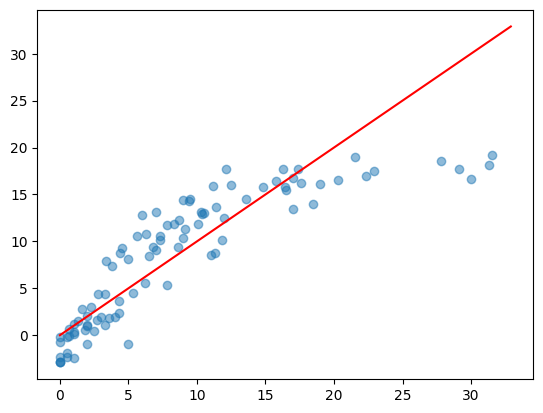

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color="red") #This code is to draw a line, in a perfect prediction where actual values y is eqaul to predicted values of y.
plt.show()
#The points are grouped around the line nicely, this means that there is a good correlation between the data and the line
#It suggests that the model is performing well in terms of predicting the dependent variable (target variable) based on the given features.
#the proximity of actual values to the predicted values along the regression line indicates that the model is capturing the underlying patterns in the data.

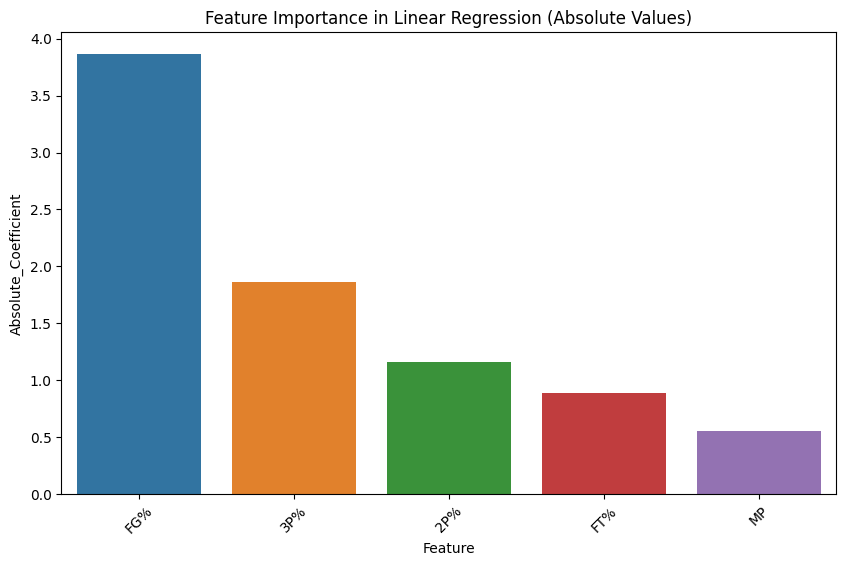

In [ ]:
#Visualizing my most effective independent variable, most effective = the most change it will have on the dependent variable
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
# Reset index to use column names as a variable for plotting
coef_df = coef_df.reset_index()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Absolute_Coefficient', x='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression (Absolute Values)')
plt.xticks(rotation=45) # Rotates labels to 45 degrees
plt.show()


In [ ]:
#Now I will create a second model

In [ ]:
mod2 = df[['PTS','MP','FGA','FG%','eFG%','3PA','3P%','2PA','2P%','FTA','FT%','TRB','ORB','AST','STL','BLK','TOV']]

In [ ]:
X = mod2.drop('PTS', axis=1)

In [ ]:
y = mod2['PTS']

In [ ]:
X.shape, y.shape

((463, 16), (463,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#y_pred is predicted values of the target variable, now we compare those to the actual values, we do this to evaluate the perforance of the model
# for example, as a player increases their field goal attempts, what is the likely hood their PPG increses.
y_pred = model.predict(X_test)

In [ ]:
r_squared = r2_score(y_test, y_pred)
#variance of dependent variable, explained by the independent variables
#how well model fits the data, higher is better

In [ ]:
#Adding more independent variables may help capture additional variation in the dependent variable.
#If the new variables contribute meaningful information about the target variable, the model can better explain the observed variance in the data.
#We cant completely rule out overfitting and multicolinearity
print(f"R-squared: {r_squared}")

R-squared: 0.9675110618737752


In [ ]:
#insight #1
#introduction of new variables to the model, has changed my minutes played coefficient from a postive value to a negative value
#The variables added in the second model might be correlated with "Minutes Played" (MP), causing the model to adjust the coefficient for MP to account for the shared variance.
#we cant completely rule out multicollinearity
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

   Feature  Coefficient
0       MP    -0.011275
1      FGA     4.074810
2      FG%    -1.936430
3     eFG%     5.419068
4      3PA    -3.009251
5      3P%     0.310757
6      2PA    -3.082831
7      2P%    -0.182669
8      FTA     0.895769
9      FT%     0.041888
10     TRB     0.139446
11     ORB    -0.314215
12     AST    -0.064055
13     STL    -0.077682
14     BLK     0.193258
15     TOV    -0.019335


In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

#average squared distance between predicted and actual values, lower is better
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

#value of dependent variable when independent values are all zero, if positive target increases as features increase, if negative target decreases as features decrease
intercept = model.intercept_
print(f"Intercept: {intercept}")

Adjusted R-squared: 0.960671285426149
Mean squared error: 1.982858606076464
Intercept: -1.6727074941572209


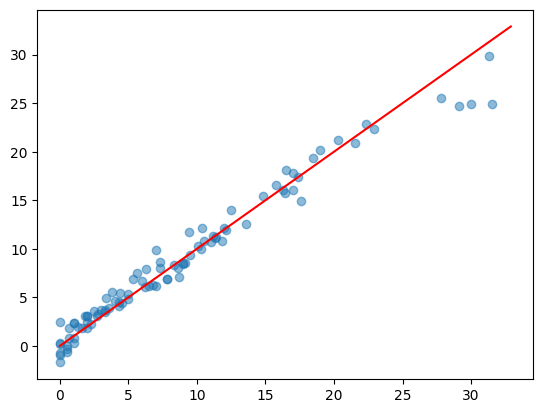

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color="red") #This code is to draw a line, in a perfect prediction where actual values y is eqaul to predicted values of y.
plt.show()
#The points are grouped around the line nicely, this means that there is a good correlation between the data and the line

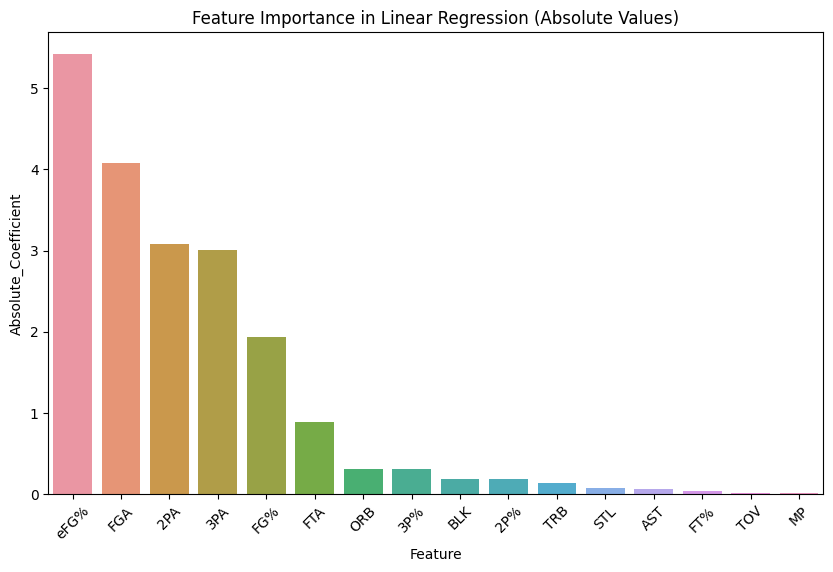

In [ ]:
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
# Reset index to use column names as a variable for plotting
coef_df = coef_df.reset_index()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Absolute_Coefficient', x='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression (Absolute Values)')
plt.xticks(rotation=45) # Rotates labels to 45 degrees
plt.show()


In [ ]:
mod3 = df[['PTS','MP','Age','TRB','AST','STL','BLK','PF']]

In [ ]:
X = mod3.drop('PTS', axis=1)

In [ ]:
y = mod3['PTS']

In [ ]:
X.shape, y.shape

((463, 7), (463,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
#y_pred is predicted values of the target variable, now we compare those to the actual values, we do this to evaluate the perforance of the model
# for example, as a player increases their field goal attempts, what is the likely hood their PPG increses.
y_pred = model.predict(X_test)

In [ ]:
r_squared = r2_score(y_test, y_pred)
#variance of dependent variable, explained by the independent variables
#how well model fits the data, higher is better

In [ ]:
print(f"R-squared: {r_squared}")

R-squared: 0.7324844577183003


In [ ]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coef_df)

  Feature  Coefficient
0      MP     0.589724
1     Age    -0.142118
2     TRB     0.180525
3     AST     0.621406
4     STL    -0.730667
5     BLK     0.782667
6      PF    -1.460736


In [ ]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adjusted_r_squared}")

#average squared distance between predicted and actual values, lower is better
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

#value of dependent variable when independent values are all zero, if positive target increases as features increase, if negative target decreases as features decrease
intercept = model.intercept_
print(f"Intercept: {intercept}")

Adjusted R-squared: 0.7104537660009839
Mean squared error: 16.32695698491634
Intercept: 1.7727545447180013


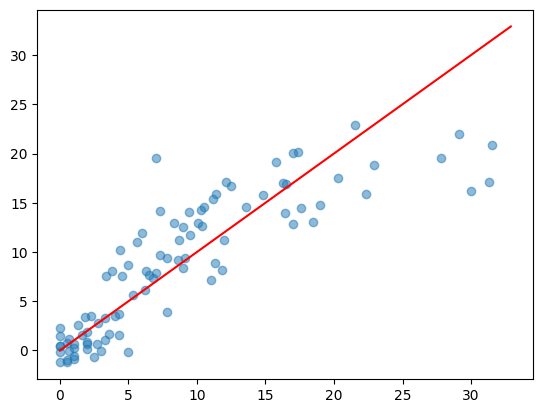

In [ ]:
plt.scatter(y_test,y_pred, alpha=0.5)
plt.plot([y.min(),y.max()],[y.min(),y.max()],color="red") #This code is to draw a line, in a perfect prediction where actual values y is eqaul to predicted values of y.
plt.show()
#The points are grouped around the line nicely, this means that there is a good correlation between the data and the line

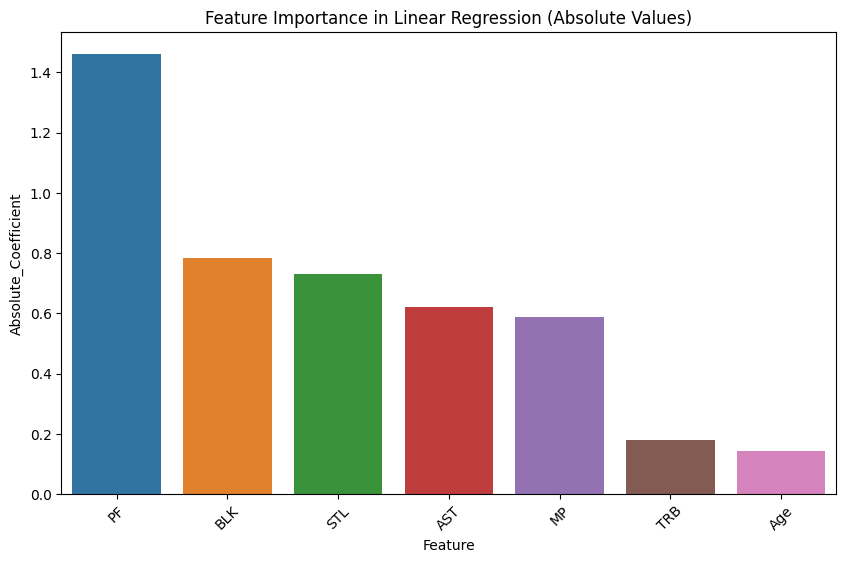

In [ ]:
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
# Reset index to use column names as a variable for plotting
coef_df = coef_df.reset_index()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Absolute_Coefficient', x='Feature', data=coef_df)
plt.title('Feature Importance in Linear Regression (Absolute Values)')
plt.xticks(rotation=45) # Rotates labels to 45 degrees
plt.show()


In [ ]:
#Insight 1
#The change for MP variable coefficient from model 1 to model 2 to went from positive to negative
#I found this cool because initially it seems like MP being negative makes no sense
#However I found out that due to the new variables added in the 2nd model, some of the new variables might be correlated to MP
#Therefore causing the model to adjust the coefficient for MP

In [ ]:
#Insight 2
# For model 1 and 2 FG% and eFG% were the most contributing factors to PPG
# However for model 3 when FG variables were not present, PF were the most contributing factor variable.
#I found this interesting because I assumed that for model 3, minutes played or TRB would be the most contributing factor.
#It turns out that Personal fouls have such a high negative coef because as you commit more fouls you will have less MP, therefore less PPG.